In [156]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns

#part 1
#Problem 1

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_q = "SELECT teamID, yearID, sum(salary)/1000 as total_payroll_by_thousand, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID, yearID"

team_q = "SELECT (W*100.0/G) as winning_percentage, * FROM Teams GROUP BY teamID, yearID"

mean_q = "SELECT yearID, sum(salary)/count(salary) as salary_mean FROM Salaries GROUP BY yearID"


salaries = pd.read_sql(salary_q, conn)
team = pd.read_sql(team_q, conn)
mean = pd.read_sql(mean_q,conn)
#team_salaries
result = pd.merge(salaries, team, how='outer', on=['teamID','yearID'])
result = pd.merge(result, mean, how='outer', on=['yearID'])
#team_table
(result)

#Pretty much just used inner join to ignore the missing the data

,teamID,yearID,total_payroll_by_thousand,payroll_mean,winning_percentage,lgID,franchID,divID,Rank,G,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,salary_mean
0,ATL,1985,14807.000,673045.454545,40.740741,NL,ATL,W,5.0,162.0,...,0.97,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105.0,106.0,ATL,ATL,ATL,476299.447273
1,BAL,1985,11560.712,525486.909091,51.552795,AL,BAL,E,4.0,161.0,...,0.98,Baltimore Orioles,Memorial Stadium,2132387.0,97.0,97.0,BAL,BAL,BAL,476299.447273
2,BOS,1985,10897.560,435902.400000,49.693252,AL,BOS,E,5.0,163.0,...,0.97,Boston Red Sox,Fenway Park II,1786633.0,104.0,104.0,BOS,BOS,BOS,476299.447273
3,CAL,1985,14427.894,515281.928571,55.555556,AL,ANA,W,2.0,162.0,...,0.98,California Angels,Anaheim Stadium,2567427.0,100.0,100.0,CAL,CAL,CAL,476299.447273
4,CHA,1985,9846.178,468865.619048,52.147239,AL,CHW,W,3.0,163.0,...,0.98,Chicago White Sox,Comiskey Park,1669888.0,104.0,104.0,CHW,CHA,CHA,476299.447273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,CHN,1878,NaN,NaN,49.180328,NL,CHC,None,4.0,61.0,...,0.89,Chicago White Stockings,Lake Front Park I,NaN,106.0,105.0,CHC,CHN,CHN,NaN
2773,CN1,1878,NaN,NaN,60.655738,NL,CNR,None,2.0,61.0,...,0.90,Cincinnati Reds,Avenue Grounds,NaN,91.0,92.0,CIN,CN1,CN1,NaN
2774,IN1,1878,NaN,NaN,38.095238,NL,IBL,None,5.0,63.0,...,0.89,Indianapolis Blues,South Street Park,NaN,87.0,89.0,IND,IN1,IN1,NaN
2775,ML2,1878,NaN,NaN,24.590164,NL,MLG,None,6.0,61.0,...,0.86,Milwaukee Grays,Eclipse Park II,NaN,106.0,113.0,MLG,ML2,ML2,NaN


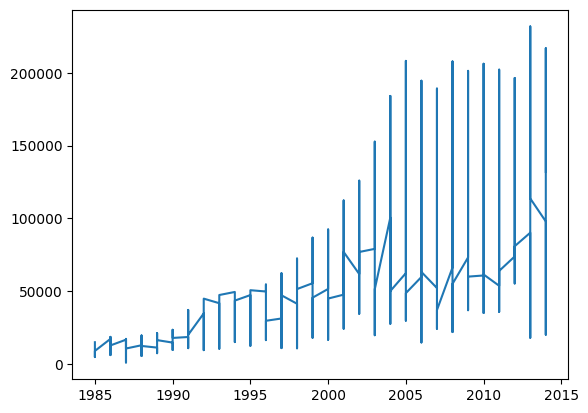

,yearID,total_payroll_by_thousand
teamID,,
ATL,1990,14555.501
BAL,1990,9680.084
BOS,1990,20558.333
CAL,1990,21720.000
CHA,1990,9491.500
...,...,...
SLN,2014,120693.000
TBA,2014,72689.100
TEX,2014,112255.059


In [157]:
#Part 2
#Problem 2


import matplotlib.pyplot as plt
import numpy

temp_1990 = result[result['yearID'] >= 1990]
temp_1990 = temp_1990[temp_1990['yearID'] <= 2014]
temp_1990.sort_values("yearID")
temp_1990 = temp_1990[['yearID', 'teamID', 'total_payroll_by_thousand']]
temp_1990 = temp_1990.set_index('teamID')

plt.plot(result['yearID'],result['total_payroll_by_thousand'])

# for index, row in temp_1990.iterrows():
#     plt.plot(row, label=index)
plt.show()



# for team in temp_1990:
#      plt.plot(temp_1990.loc[team,'yearID'], temp_1990.loc[team,'total_payroll_by_thousand'],color=numpy.random.rand(3,))

# x_values = temp_1990["yearID"].unique()
# y_values = temp_1990.loc[temp_1990["total_payroll_by_thousand"].idxmax()]

# plt.plot(x_values, y_values)
# plt.xlabel('x - axis')
# # naming the y axis
# plt.ylabel('y - axis')
  
# # giving a title to my graph
# plt.title('My first graph!')
  
# # function to show the plot
# plt.show()

(temp_1990)


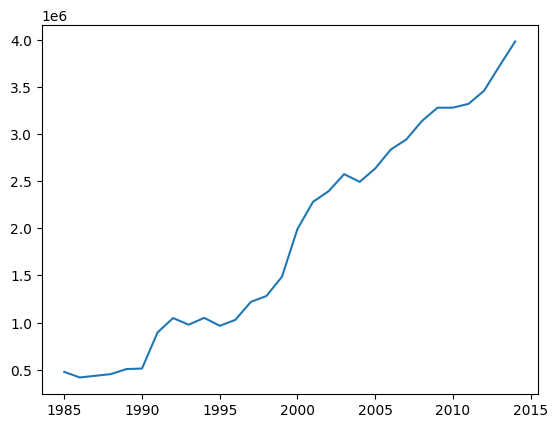

In [158]:
#Problem 3
result.sort_values("salary_mean", ascending=True)
plt.plot(result['yearID'],result['salary_mean'])

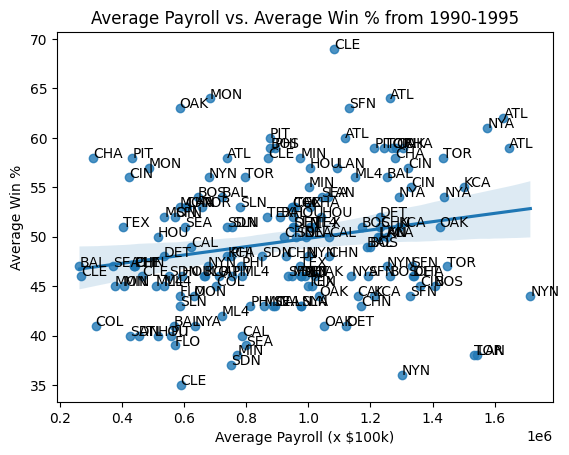

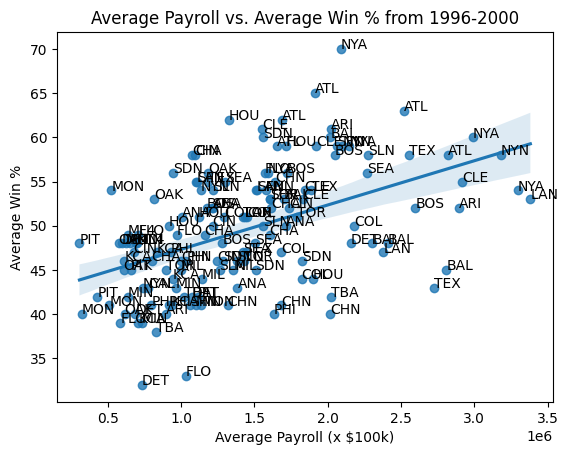

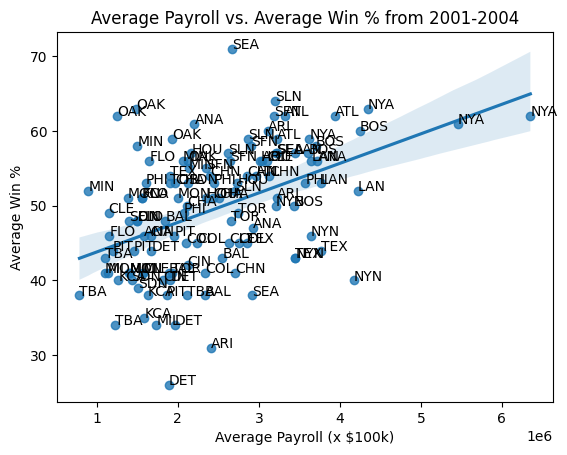

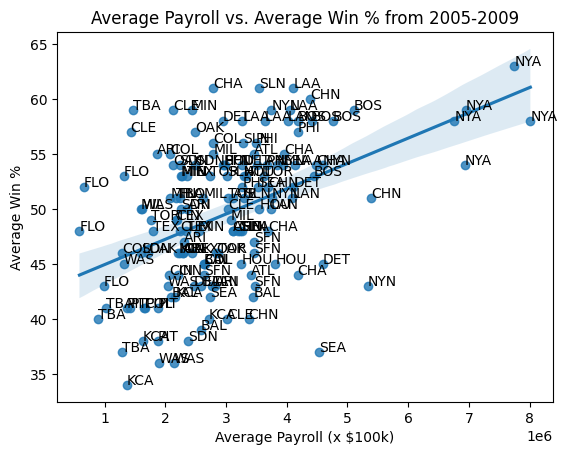

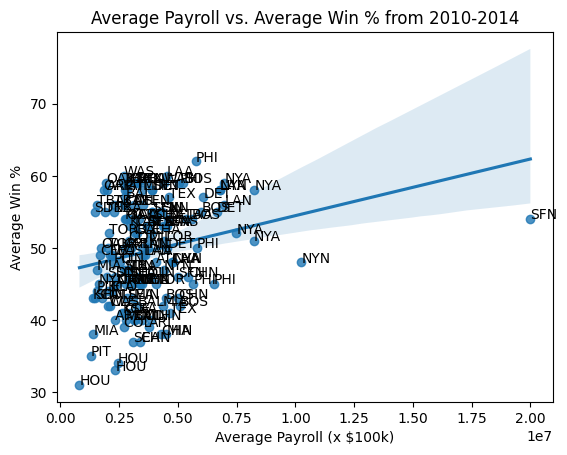

In [159]:
#Problem 4
import seaborn as sns
query1 = "SELECT teamID, yearID, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
query2 = "SELECT teamID, yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID,yearID"

table1 = pd.read_sql(query1, conn)
table2 = pd.read_sql(query2,conn)

group_table = pd.merge(table1, table2, how='outer', on=['yearID','teamID'])

group_table=group_table.dropna(subset=['payroll_mean'])
group_table=group_table.dropna(subset=['winning_percentage'])
group_table=group_table.dropna(subset=['teamID'])

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
table_cpy1 = group_table
table_cpy2 = group_table
table_cpy3 = group_table
table_cpy4 = group_table
table_cpy5 = group_table

        
#Bin 1: 1990-1995
table_cpy1 = table_cpy1[table_cpy1['yearID'] >= 1990]
table_cpy1 = table_cpy1[table_cpy1['yearID'] <= 1995]
payroll_vs_wins_scatter1 = sns.regplot(data=table_cpy1, x="payroll_mean", y="winning_percentage")
label_point(table_cpy1["payroll_mean"], table_cpy1["winning_percentage"], table_cpy1["teamID"], plt.gca())
payroll_vs_wins_scatter1.set(xlabel = "Average Payroll (x $100k)", ylabel = "Average Win %", title = "Average Payroll vs. Average Win % from 1990-1995");
plt.show()

#Bin 2: 1996-2000
table_cpy2 = table_cpy2[table_cpy2['yearID'] >= 1996]
table_cpy2 = table_cpy2[table_cpy2['yearID'] <= 2000]
payroll_vs_wins_scatter2 = sns.regplot(data=table_cpy2, x="payroll_mean", y="winning_percentage")
label_point(table_cpy2["payroll_mean"], table_cpy2["winning_percentage"], table_cpy2["teamID"], plt.gca())
payroll_vs_wins_scatter2.set(xlabel = "Average Payroll (x $100k)", ylabel = "Average Win %", title = "Average Payroll vs. Average Win % from 1996-2000");
plt.show()

#Bin 3: 2001-2004
table_cpy3 = table_cpy3[table_cpy3['yearID'] >= 2001]
table_cpy3 = table_cpy3[table_cpy3['yearID'] <= 2004]
payroll_vs_wins_scatter3 = sns.regplot(data=table_cpy3, x="payroll_mean", y="winning_percentage")
label_point(table_cpy3["payroll_mean"], table_cpy3["winning_percentage"], table_cpy3["teamID"], plt.gca())
payroll_vs_wins_scatter3.set(xlabel = "Average Payroll (x $100k)", ylabel = "Average Win %", title = "Average Payroll vs. Average Win % from 2001-2004");
plt.show()

#Bin 4: 2005-2009
table_cpy4 = table_cpy4[table_cpy4['yearID'] >= 2005]
table_cpy4 = table_cpy4[table_cpy4['yearID'] <= 2009]
payroll_vs_wins_scatter4 = sns.regplot(data=table_cpy4, x="payroll_mean", y="winning_percentage")
label_point(table_cpy4["payroll_mean"], table_cpy4["winning_percentage"], table_cpy4["teamID"], plt.gca())
payroll_vs_wins_scatter4.set(xlabel = "Average Payroll (x $100k)", ylabel = "Average Win %", title = "Average Payroll vs. Average Win % from 2005-2009");
plt.show()

#Bin 4: 2010-2014
table_cpy5 = table_cpy5[table_cpy5['yearID'] >= 2010]
table_cpy5 = table_cpy5[table_cpy5['yearID'] <= 2014]
payroll_vs_wins_scatter5 = sns.regplot(data=table_cpy5, x="payroll_mean", y="winning_percentage")
label_point(table_cpy5["payroll_mean"], table_cpy5["winning_percentage"], table_cpy5["teamID"], plt.gca())
payroll_vs_wins_scatter5.set(xlabel = "Average Payroll (x $100k)", ylabel = "Average Win %", title = "Average Payroll vs. Average Win % from 2010-2014");
plt.show()






In [160]:
#So basically what I did was to create a seperate table from the 2 queries that essentially output the winning percentage and the payroll mean which allows me to use that table to output whatever graph I want.

In [161]:
#Question 2
#Part 3
#problem 5
import statistics



result=result.dropna(subset=['payroll_mean'])
result=result.dropna(subset=['salary_mean'])
result=result.dropna(subset=['teamID'])
result=result.dropna(subset=['total_payroll_by_thousand'])

std_table = result
std_table = std_table[['yearID', 'teamID', 'total_payroll_by_thousand','payroll_mean','name','salary_mean','winning_percentage']]

df_stddev_payroll = std_table['total_payroll_by_thousand'].std()

standardized_payroll = []


year_temp = 1985

        
        

for index, row in std_table.iterrows():
    if row['yearID'] == 'NaN':
        standardized_payroll.append(1)
    if row["yearID"] == year_temp:
        standardized_payroll.append((row["total_payroll_by_thousand"]-row['payroll_mean'])/df_stddev_payroll)
    elif row['yearID'] != year_temp:
        year_temp = row['yearID']
        
        
for x in range(29):
    standardized_payroll.append(1)
        
std_table = std_table.assign(standard_payroll=standardized_payroll)

std_table
        
        




# df_std_payrolls = result[130:].reset_index(drop=True)

# df_map = group_table[130:].drop(['teamID', 'total_payroll_by_thousand', 'std_payroll'], axis=1).reset_index(drop=True)
# df_map['payroll_mean'] = df_std_payrolls['yearID'].map(df_average_payroll.set_index('yearID')['payroll_mean'])
# df_map['stddev_payroll'] = df_std_payrolls['yearID'].map(df_stddev_payroll.set_index('yearID')['stddev_payroll'])



,yearID,teamID,total_payroll_by_thousand,payroll_mean,name,salary_mean,winning_percentage,standard_payroll
0,1985,ATL,14807.000,6.730455e+05,Atlanta Braves,4.762994e+05,40.740741,-16.501620
1,1985,BAL,11560.712,5.254869e+05,Baltimore Orioles,4.762994e+05,51.552795,-12.883803
2,1985,BOS,10897.560,4.359024e+05,Boston Red Sox,4.762994e+05,49.693252,-10.654601
3,1985,CAL,14427.894,5.152819e+05,California Angels,4.762994e+05,55.555556,-12.556093
4,1985,CHA,9846.178,4.688656e+05,Chicago White Sox,4.762994e+05,52.147239,-11.507326
...,...,...,...,...,...,...,...,...
855,2014,SLN,120693.000,4.310464e+06,St. Louis Cardinals,3.980446e+06,55.555556,1.000000
856,2014,TBA,72689.100,2.907564e+06,Tampa Bay Rays,3.980446e+06,47.530864,1.000000
857,2014,TEX,112255.059,4.677294e+06,Texas Rangers,3.980446e+06,41.358025,1.000000
858,2014,TOR,109920.100,4.396804e+06,Toronto Blue Jays,3.980446e+06,51.234568,1.000000


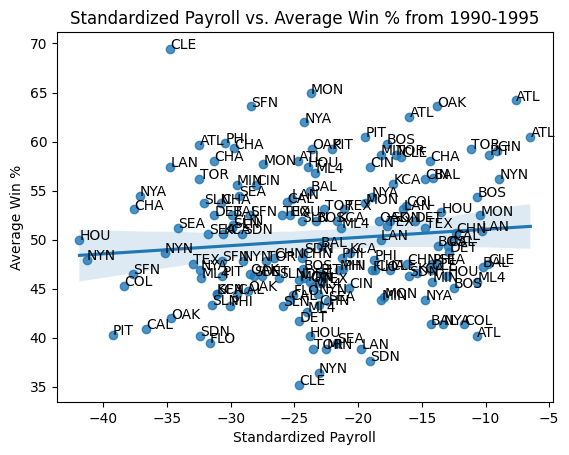

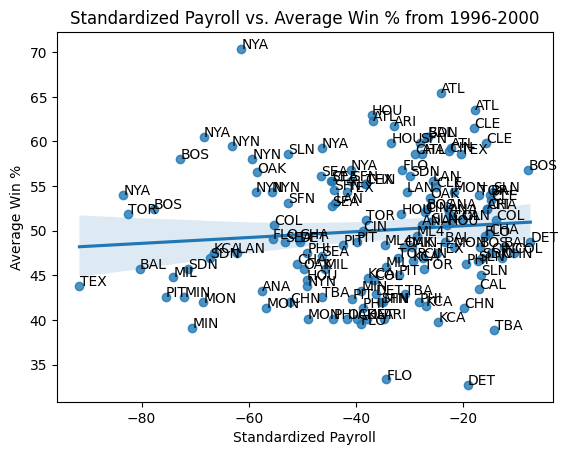

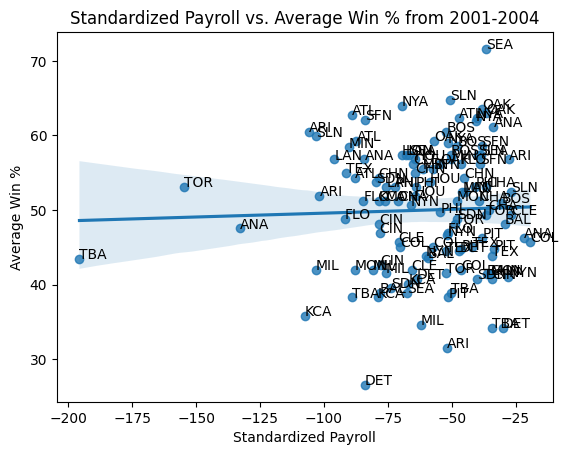

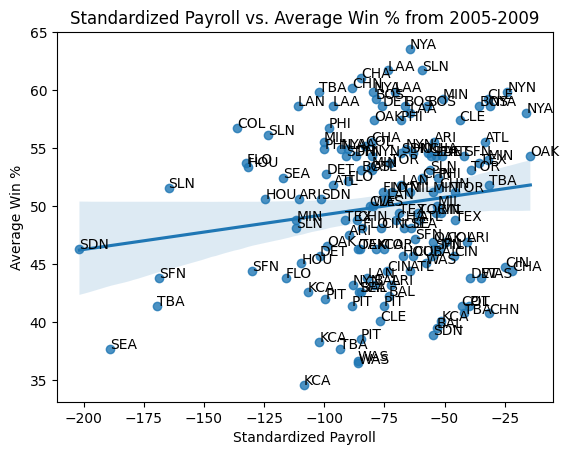

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


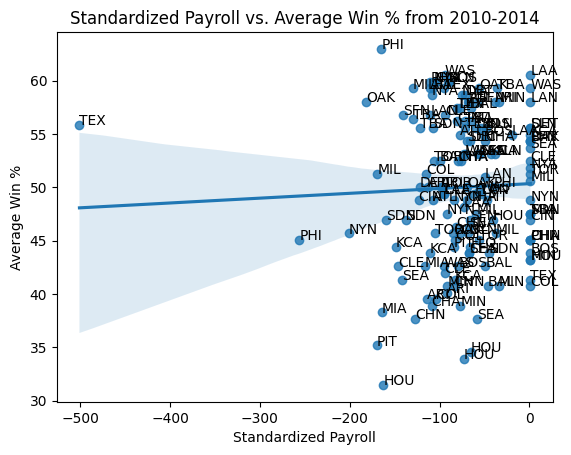

In [162]:
#problem 6

std_table_t1 = std_table
std_table_t2 = std_table
std_table_t3 = std_table
std_table_t4 = std_table
std_table_t5 = std_table




# Bin 1: 1990-1995
std_table_t1 = std_table_t1[std_table_t1['yearID'] >= 1990]
std_table_t1 = std_table_t1[std_table_t1['yearID'] <= 1995]
std_payroll_vs_wins_scatter1 = sns.regplot(data=std_table_t1, x="standard_payroll", y="winning_percentage")
label_point(std_table_t1["standard_payroll"], std_table_t1["winning_percentage"], std_table_t1['teamID'], plt.gca())
std_payroll_vs_wins_scatter1.set(xlabel = "Standardized Payroll", ylabel = "Average Win %", title = "Standardized Payroll vs. Average Win % from 1990-1995");
plt.show()

# Bin 2: 1996-2000
std_table_t2 = std_table_t2[std_table_t2['yearID'] >= 1996]
std_table_t2 = std_table_t2[std_table_t2['yearID'] <= 2000]
std_payroll_vs_wins_scatter2 = sns.regplot(data=std_table_t2, x="standard_payroll", y="winning_percentage")
label_point(std_table_t2["standard_payroll"], std_table_t2["winning_percentage"], std_table_t2['teamID'], plt.gca())
std_payroll_vs_wins_scatter2.set(xlabel = "Standardized Payroll", ylabel = "Average Win %", title = "Standardized Payroll vs. Average Win % from 1996-2000");
plt.show()

# Bin 3: 2001-2004
std_table_t3 = std_table_t3[std_table_t3['yearID'] >= 2001]
std_table_t3 = std_table_t3[std_table_t3['yearID'] <= 2004]
std_payroll_vs_wins_scatter3 = sns.regplot(data=std_table_t3, x="standard_payroll", y="winning_percentage")
label_point(std_table_t3["standard_payroll"], std_table_t3["winning_percentage"], std_table_t3['teamID'], plt.gca())
std_payroll_vs_wins_scatter3.set(xlabel = "Standardized Payroll", ylabel = "Average Win %", title = "Standardized Payroll vs. Average Win % from 2001-2004");
plt.show()

# Bin 4: 2005-2009
std_table_t4 = std_table_t4[std_table_t4['yearID'] >= 2005]
std_table_t4 = std_table_t4[std_table_t4['yearID'] <= 2009]
std_payroll_vs_wins_scatter4 = sns.regplot(data=std_table_t4, x="standard_payroll", y="winning_percentage")
label_point(std_table_t4["standard_payroll"], std_table_t4["winning_percentage"], std_table_t4['teamID'], plt.gca())
std_payroll_vs_wins_scatter4.set(xlabel = "Standardized Payroll", ylabel = "Average Win %", title = "Standardized Payroll vs. Average Win % from 2005-2009");
plt.show()


# Bin 5: 2010-2014
std_table_t5 = std_table_t5[std_table_t5['yearID'] >= 2010]
std_table_t5 = std_table_t5[std_table_t5['yearID'] <= 2014]
std_payroll_vs_wins_scatter5 = sns.regplot(data=std_table_t5, x="standard_payroll", y="winning_percentage")
label_point(std_table_t5["standard_payroll"], std_table_t5["winning_percentage"], std_table_t5['teamID'], plt.gca())
std_payroll_vs_wins_scatter5.set(xlabel = "Standardized Payroll", ylabel = "Average Win %", title = "Standardized Payroll vs. Average Win % from 2010-2014");
plt.show()

In [163]:
#So essentially the difference is pretty uncanny as all I did for the 2nd iteration of the bins is that the added columns such as the standardized [ayroll allowed the graph to produce different results then usual]

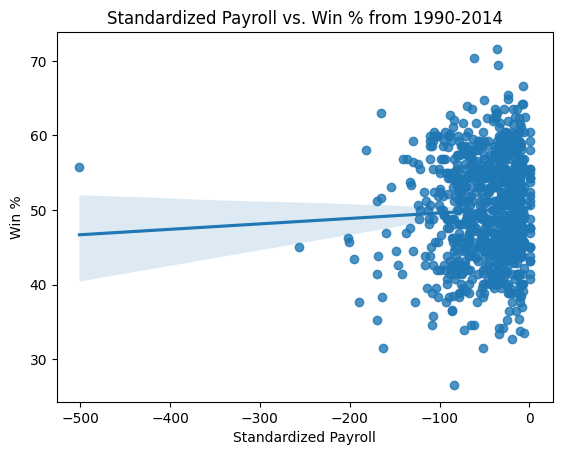

In [164]:
#Question 3
#problem 7


# Scatterplot of std payroll and win pct across all years for every team
std_payroll_vs_wins_scatter_all = sns.regplot(data=std_table, x="standard_payroll", y="winning_percentage")
std_payroll_vs_wins_scatter_all.set(xlabel = "Standardized Payroll", ylabel = "Win %", title = "Standardized Payroll vs. Win % from 1990-2014");
plt.show()





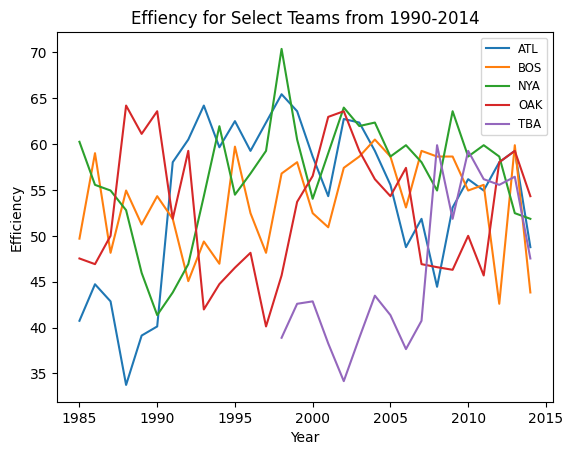

In [165]:
#problem 8

std_table['exp_win_pct'] = 50 + (2.5 * std_table['standard_payroll'])
std_table['efficiency'] = std_table['winning_percentage']

# Drawing lineplot
df_team_set = std_table.loc[std_table['teamID'].isin(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])]
team_set_lineplot = sns.lineplot(data=df_team_set, x="yearID", y="efficiency", hue="teamID", style="teamID", dashes=False)
team_set_lineplot.set(xlabel = "Year", ylabel = "Efficiency", title = "Effiency for Select Teams from 1990-2014");
team_set_lineplot.legend(loc="upper right", fontsize="small");

#Question 4

#we saw that Oakland performed well with a lower annual payroll between the Moneyball period; however, it was hard to directly contrast their spending efficiency with other successful teams. With this most recent plot, we can immediately compare Oakland's effiency with other teams. Over the Moneyball period, it's obvious that Oakland's effiency far surpassed its competitors'. In fact, it just about acts as the graph maximum, only to be closely matched by the Yankees' efficiency a few years earlier. The Moneyball period represents the short-lived success of the Athletics, as they fall to the bottom of the chart until 2012-2013 where they top the efficiency standings once again.